## Preparación Base de Datos

Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib as plt

Lectura de datos. Previamente sabíamos que los datos nulos estaban con 0, por lo que a los valores con 0 los identificaremos como nulos.

In [2]:
df = pd.read_csv("C:/Users/paty_/Downloads/co2_emission.csv",encoding='utf8', na_values=0)

Visualización de datos.
* .shape para el número de filas y columnas
* .head para la visualización de los títulos de las columnas y las primeras 5 filas

In [3]:
df.shape    

(20853, 4)

In [4]:
df.head()   

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [5]:
df.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (tonnes )'], dtype='object')

De esto, observamos que tenemos 4 columnas. Entity, que es el país; Code, el código ISO del país; Year, el año de la emisión de CO2 y Annual CO2 emissions (tonnes), la emisión de CO2 por año medida en toneladas. El nombre de la columna 4 es complicado por el subíndice de CO2, lo cambiaremos a "CO2emissions" para hacerlo más simple. Duplicaremos nuestros datos en "data_frame" para mantener los originales. Consideramos que el orden de las columnas está bien para lo que trabajaremos y no se necesita agregar o quitar alguna.

In [6]:
data_frame=df

In [7]:
data_frame=data_frame.rename(columns = {'Annual CO₂ emissions (tonnes )':'CO2emissions'})

Queremos saber cuántos países diferentes tenemos:

In [8]:
len(list(data_frame.Entity.unique()))

233

Tipo de datos que tenemos:

In [9]:
data_frame.dtypes

Entity           object
Code             object
Year              int64
CO2emissions    float64
dtype: object

Verificar si tenemos datos nulos en alguna columna.

In [10]:
data_frame.isnull().any()

Entity          False
Code             True
Year            False
CO2emissions     True
dtype: bool

Saber cuántos datos nulos son:

In [11]:
data_frame.isnull().sum()

Entity             0
Code            2207
Year               0
CO2emissions    1289
dtype: int64

Queremos saber qué países tienen código nulo y asignales uno.

In [12]:
nulos=data_frame[data_frame.Code.isnull()]

In [13]:
list(nulos.Entity.unique())

['Africa',
 'Americas (other)',
 'Antarctic Fisheries',
 'Asia and Pacific (other)',
 'EU-28',
 'Europe (other)',
 'International transport',
 'Kyrgysztan',
 'Middle East',
 'Statistical differences',
 'Wallis and Futuna Islands']

In [14]:
data_frame.loc[data_frame['Entity'] == 'Africa', 'Code'] = 'AFR'
data_frame.loc[data_frame['Entity'] == 'Americas (other)', 'Code'] = 'AME'
data_frame.loc[data_frame['Entity'] == 'Antarctic Fisheries', 'Code'] = 'ANF'
data_frame.loc[data_frame['Entity'] == 'Asia and Pacific (other)', 'Code'] = 'AAP'
data_frame.loc[data_frame['Entity'] == 'EU-28', 'Code'] = 'E28'
data_frame.loc[data_frame['Entity'] == 'Europe (other)', 'Code'] = 'EUO'
data_frame.loc[data_frame['Entity'] == 'International transport', 'Code'] = 'INT'
data_frame.loc[data_frame['Entity'] == 'Kyrgysztan', 'Code'] = 'KYR'
data_frame.loc[data_frame['Entity'] == 'Middle East', 'Code'] = 'MIE'
data_frame.loc[data_frame['Entity'] == 'Statistical differences', 'Code'] = 'STD'
data_frame.loc[data_frame['Entity'] == 'Wallis and Futuna Islands', 'Code'] = 'WFI'

Queremos ver ahora si ya no hay "Code" nulos.

In [15]:
data_frame.isnull().sum()

Entity             0
Code               0
Year               0
CO2emissions    1289
dtype: int64

Duplicamos nuevamente nuestros datos en "df_drop" que será nuestro data frame sin datos nulos.

In [16]:
df_drop = data_frame.dropna()

Verificamos que sí se hayan eliminado los datos nulos:

In [17]:
df_drop.shape  

(19564, 4)

In [18]:
df_drop.isnull().any()

Entity          False
Code            False
Year            False
CO2emissions    False
dtype: bool

In [19]:
df_drop.isnull().sum()

Entity          0
Code            0
Year            0
CO2emissions    0
dtype: int64

Vemos cuántos países quedaron en el data frame después de eliminar los datos nulos. 

In [20]:
len(list(df_drop.Entity.unique()))

232

No tenemos datos de todos los países para todos los años, así que graficaremos para saber a partir de qué año comenzamos a tener más datos.

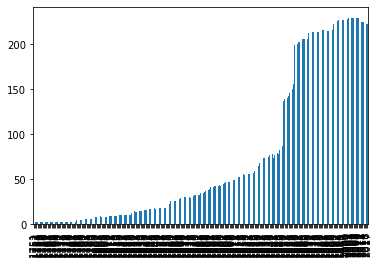

In [21]:
df_drop['Year'].value_counts().sort_index().plot.bar()

Vimos que son muchos años y no se aprecia bien a partir de qué año comenzamos a tener más datos. Haremos un histograma para visualizar mejor.

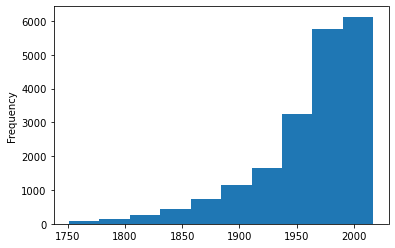

In [22]:
df_drop['Year'].plot.hist()

Vemos que a partir de 1950 hay más datos. Haremos nuevamente un histograma sólo para los años que son mayor o igual a 1950.

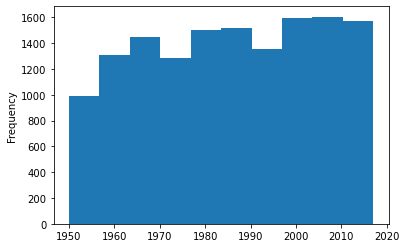

In [23]:
df_drop[df_drop['Year']>=1950]['Year'].plot.hist()

Hacemos una gráfica de barras para los años mayores o iguales a 1950.

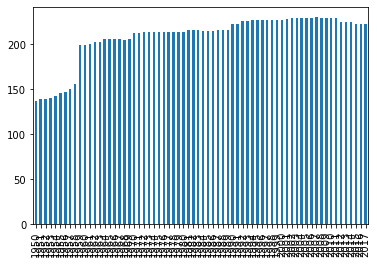

In [24]:
df_drop[df_drop['Year']>=1950]['Year'].value_counts().sort_index().plot.bar()

Todavía en los primeros años hay alrededor de 50 países que faltan, verificaremos ahora con los años que son mayores o iguales a 1960, ya que en el último histograma es en donde los datos por año aumentan.

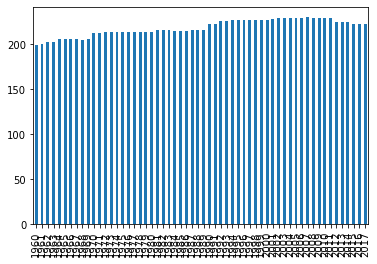

In [25]:
df_drop[df_drop['Year']>=1960]['Year'].value_counts().sort_index().plot.bar()

Aquí ya se ve muy similar la cantidad de países de los que se tienen datos. Por lo que para nuestra base de datos final usaremos la que no tiene datos nulos y además los datos de la columna "Year" son mayor o igual a 1960.

In [26]:
dataframe=df_drop[df_drop['Year']>=1960]

Verificamos la cantidad de datos total que tenemos en nuestra base de datos a utilizar.

In [27]:
dataframe.shape  

(12677, 4)

In [28]:
len(list(dataframe.Entity.unique()))

232

Finalmente creamos un archivo .csv con el dataframe que usaremos.

In [29]:
dataframe.to_csv('dfco2emissions.csv')

En resumen, tendremos 232 entidades con medición de CO2 emitido (en toneladas) a partir de 1960 que en total nos dan 12,677 datos.